# NLP Assignment- IMDB Sentiment Analysis Dataset- Mohamed Helayhel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb 

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Dataset- IMDB
The IMDB dataset is a collection of 50,000 movie reviews from the Internet Movie Database (IMDB) that have been preprocessed and labeled by sentiment (positive/negative). The dataset is split into 25,000 reviews for training and 25,000 reviews for testing. Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).

**Desired Output:** This dataset was previously used with RNNs(LSTMs) with limited preprocessing, and we faced some issues with overfitting and early plateaus. This time, the same dataset will be explored with the use of more advanced NLP Methods, such as the removal of stop words, text lemmatization, as well as the use of pre-trained embeddings like GloVe. The overall objective remains the same, and it is to analyze the words in a movie review sequentially and predict whether the review is positive or negative.

In [4]:
# Parameters
max_vocab = 10000  # Top 10,000 words
max_length = 200   # Max review length

# Set the random seed for reproducibility
np.random.seed(42)

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_vocab)

**NOTE:** num_words=10000 means that only the top 10,000 most frequent words will be kept in the dataset.

In [7]:
X_train.shape

(25000,)

In [9]:
y_train.shape

(25000,)

In [11]:
X_test.shape

(25000,)

In [13]:
y_test.shape

(25000,)

In [15]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [17]:
y_train[0:99]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

### **Initial Exploration of data**

**Processing the Data for the Neural Network**:

* max_vocab = 10000: This line sets 
the maximum vocabulary size to 10,000 words. This means that only the 10,000 most frequent words in the dataset will be considered, and less common words will be ignored.

* max_length = 200: This line sets the maximum length of a review to 200 words. Reviews longer than 200 words will be truncated, and shorter reviews will be padded.

* X_train and X_test contain the movie reviews themselves (represented as sequences of word indices) as seen above.

* y_train and y_test will contain the corresponding sentiment labels (0 for negative, 1 for positive).

* pad_sequences function is used such that it takes X_train and X_test (the movie review sequences) and pads or truncates them to ensure they all have a length of max_length (200 words in this case). If a review is shorter than 200 words, it will be padded with zeros at the beginning to reach the desired length. If a review is longer than 200 words, it keeps the first 200 words only.

In summary, the code below preprocesses the IMDB movie review data to make it suitable for input to a Recurrent Neural Network (RNN). It limits the vocabulary size, ensures all reviews have the same length, and prepares the data for training and testing.

In [33]:
from keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure equal length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (25000, 200), Test data shape: (25000, 200)


In [35]:
from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128))
model.add(LSTM(64, return_sequences=True, activation='relu'))  # Layer 1
model.add(LSTM(32, return_sequences=True, activation='relu'))  # Layer 2
model.add(LSTM(16, activation='relu'))                         # Layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
        X_train, y_train, 
        validation_split=0.2, 
        epochs=10, 
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping]
    )

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 110ms/step - accuracy: 0.5212 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.4995 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.4914 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.4973 - loss: nan - val_accuracy: 0.5062 - val_loss: nan


## Model 1 Design and Performance 
* Embedding: Used for representing words (or tokens) as dense vectors in a lower-dimensional space. It is essential for Natural Language Processing (NLP) tasks for dimensionality reduction as well as capturing semantic relationships between the provided words snce similar words are assigned similar representations.
* LSTM: Core building blocks for creating sequential models. A recurrent layer with Long Short-Term Memory, which helps capture long-term dependencies in data sequences and avoid vanishing or exploding gradient proe 
* Dense: A fully connected neural network layer with a single output neuron, crucial for transforming the learned features into a format suitable for making predictions.
* Performance: the model has an overall low accuracy with no signs of improvement over the epochs. An early_stopping callback was implemented, which goes into effect if the model fails to reduce validation loss after >3 runs. In this case, the loss is substantial and shows up as nan.


## Further Processing of Data

In [141]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the IMDB dataset
(x_train_raw, y_train), (x_test_raw, y_test) = imdb.load_data(num_words=None)

# Get word index for decoding
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode function to convert sequences into text
def decode_sequence(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

# Decode training and test data
x_train_decoded = [decode_sequence(seq) for seq in x_train_raw]
x_test_decoded = [decode_sequence(seq) for seq in x_test_raw]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohamedhelayhel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohamedhelayhel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
x_train_decoded[0]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [145]:
# Stop-word removal and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    filtered_words = [
        lemmatizer.lemmatize(word) for word in words if word not in stop_words and word != '?'
    ]
    return ' '.join(filtered_words)

# Apply preprocessing
x_train_processed = [preprocess_text(text) for text in x_train_decoded]
x_test_processed = [preprocess_text(text) for text in x_test_decoded]

In [147]:
x_train_processed[0]

"film brilliant casting location scenery story direction everyone's really suited part played could imagine robert redford's amazing actor director norman's father came scottish island loved fact real connection film witty remark throughout film great brilliant much bought film soon released retail would recommend everyone watch fly fishing amazing really cried end sad know say cry film must good definitely also congratulation two little boy's played part's norman paul brilliant child often left praising list think star play grown big profile whole film child amazing praised done think whole story lovely true someone's life shared u"

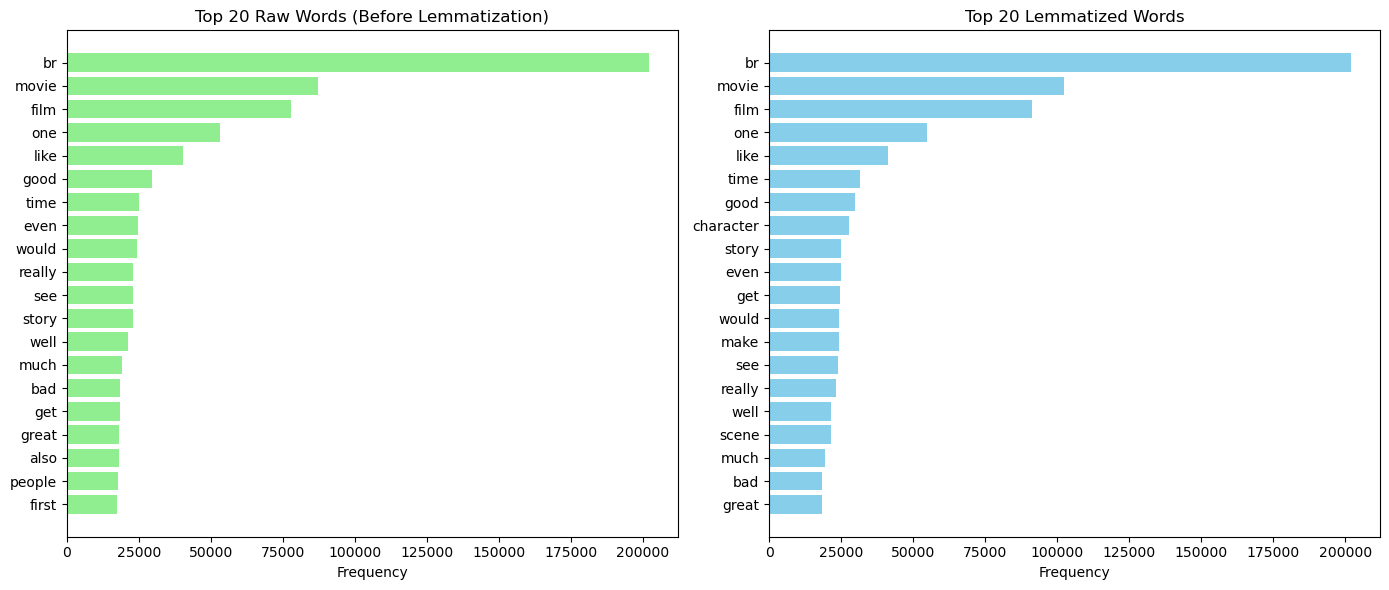

In [149]:
from collections import Counter
# Function to preprocess text without lemmatization (raw words)
def preprocess_text_raw(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and word != '?']
    return filtered_words

# Function to lemmatize and preprocess text
def preprocess_text_for_lemma(text):
    words = text.split()
    filtered_words = [
        lemmatizer.lemmatize(word) for word in words if word not in stop_words and word != '?'
    ]
    return filtered_words

# Apply preprocessing to both training and test data (raw words and lemmatized words)
x_train_raw_words = [preprocess_text_raw(text) for text in x_train_decoded]
x_test_raw_words = [preprocess_text_raw(text) for text in x_test_decoded]
x_train_lemma = [preprocess_text_for_lemma(text) for text in x_train_decoded]
x_test_lemma = [preprocess_text_for_lemma(text) for text in x_test_decoded]

# Flatten the lists to get all words
all_raw_words = [word for sentence in x_train_raw_words + x_test_raw_words for word in sentence]
all_lemma_words = [word for sentence in x_train_lemma + x_test_lemma for word in sentence]

# Count frequency of words
raw_word_counts = Counter(all_raw_words)
lemma_word_counts = Counter(all_lemma_words)

# Get the top 20 most common words
top_20_raw_words = raw_word_counts.most_common(20)
top_20_lemma_words = lemma_word_counts.most_common(20)

# Separate words and their frequencies for plotting
raw_words, raw_frequencies = zip(*top_20_raw_words)
lemma_words, lemma_frequencies = zip(*top_20_lemma_words)

# Create a side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for raw words
axes[0].barh(raw_words, raw_frequencies, color='lightgreen')
axes[0].set_title('Top 20 Raw Words (Before Lemmatization)')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()  # Invert y-axis to show highest at the top

# Plot for lemmatized words
axes[1].barh(lemma_words, lemma_frequencies, color='skyblue')
axes[1].set_title('Top 20 Lemmatized Words')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()  # Invert y-axis to show highest at the top

plt.tight_layout()
plt.show()

## Comments on Further Processing of the Data
Given the poor performance of Model 1, the section above involves further processing of the data to attempt to improve the performace of the model through the improvement of the input. Some of the techniques that were applied are:
1. Decoding the data to qualitatively assess content of reviews
2. Stop-word removal and lemmatization: attempts to reduce the sentences and words into the essential components only to improve learning. As we can see from the graph above, some words like 'character' and 'story' got elevated in relevance, while words like 'really' and 'would' regressed, which is a promising.
3. We also notice that the characters 'br' is the top word in both versions, which shows the limitations of text translation given that it isn't a legitimate word.

## Model 1 Re-attempted after further processing

In [39]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_processed)

x_train_seq = tokenizer.texts_to_sequences(x_train_processed)
x_test_seq = tokenizer.texts_to_sequences(x_test_processed)

maxlen = 200  # Maximum sequence length
x_train_padded = pad_sequences(x_train_seq, maxlen=maxlen)
x_test_padded = pad_sequences(x_test_seq, maxlen=maxlen)

from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128))
model.add(LSTM(64, return_sequences=True, activation='relu'))  # Layer 1
model.add(LSTM(32, return_sequences=True, activation='relu'))  # Layer 2
model.add(LSTM(16, activation='relu'))                         # Layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
        x_train_padded, y_train, 
        validation_split=0.2, 
        epochs=10, 
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping]
    )

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.6641 - loss: 146273.0938 - val_accuracy: 0.7986 - val_loss: 0.4864
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.8386 - loss: 162520320.0000 - val_accuracy: 0.8210 - val_loss: 0.4515
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.8516 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.4969 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.5013 - loss: nan - val_accuracy: 0.5062 - val_loss: nan


### Evaluation of upgraded model
After making upgrades to the input and keeping all other model parameters similar, we notice that epochs 1 and 2 showcase a significant improvement in both training and testing accuracy over the first model. However,the model performance drastically worsened after epoch 2, with the first sign being that the validation accuracy dropped to ~50% in epoch 3 and then training accuracy followed as well in all later epochs. This shows that the model had divergence. This gives low confidence in this model despite the improvements. This is a sign that there is a bigger flaw in the model, and the activation fucntion relu is a prime suspect, since relu either zeroes out or holds on to the actual input value which means that it may be creating exploding gradients with long sequences during backpropagation.

### Models 3 and 4: tanh activation + before and after lemmatization models

In [47]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128))
model.add(LSTM(64, return_sequences=True, activation='tanh'))  # Layer 1
model.add(LSTM(32, return_sequences=True, activation='tanh'))  # Layer 2
model.add(LSTM(16, activation='tanh'))                         # Layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
        X_train, y_train, 
        validation_split=0.2, 
        epochs=10, 
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping]
    )

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.6923 - loss: 0.5580 - val_accuracy: 0.8578 - val_loss: 0.3521
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.8902 - loss: 0.2883 - val_accuracy: 0.8662 - val_loss: 0.3247
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.9266 - loss: 0.2007 - val_accuracy: 0.8548 - val_loss: 0.3468
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.9505 - loss: 0.1422 - val_accuracy: 0.8630 - val_loss: 0.3714
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.9716 - loss: 0.0884 - val_accuracy: 0.8578 - val_loss: 0.4250


In [48]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128))
model.add(LSTM(64, return_sequences=True, activation='tanh'))  # Layer 1
model.add(LSTM(32, return_sequences=True, activation='tanh'))  # Layer 2
model.add(LSTM(16, activation='tanh'))                         # Layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
        x_train_padded, y_train, 
        validation_split=0.2, 
        epochs=10, 
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping]
        )

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 130ms/step - accuracy: 0.7572 - loss: 0.4861 - val_accuracy: 0.8726 - val_loss: 0.3129
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.9296 - loss: 0.1946 - val_accuracy: 0.8766 - val_loss: 0.3073
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.9616 - loss: 0.1159 - val_accuracy: 0.8686 - val_loss: 0.4071
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9759 - loss: 0.0771 - val_accuracy: 0.8680 - val_loss: 0.4464
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9864 - loss: 0.0494 - val_accuracy: 0.8444 - val_loss: 0.4956


### Model 3 and 4 Performance
Next, we attempted 'tanh' which is a more commonly used activation function with RNNs than relu, due to  its ability to generate an output between -1 and 1, that is centered around 0, which leads to faster convergence, as evidenced by a highly consistent validation accuracy from the first few epochs and avoids exploding gradients issues that were observed with relu. However, we also noticed that the training accuracy kept increasing substantially throughout epochs while validation remained constant, which means that the network was becoming prone to overfitting.
We do not notice a major differnce between model 3, which uses the x_train data which has the basic keras embedding without additional processing, and model 4, which includes stop-word removal and lemmatization. However, we do obvserve the highest validation accuracy in the lemmatized model in epoch 2, which is a sign that the further processing may be helping. 

### Model 5 and 6: Attempts to reduce overfitting using lower batch size

In [59]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128))
model.add(LSTM(64, return_sequences=True, activation='tanh'))  # Layer 1
model.add(LSTM(32, return_sequences=True, activation='tanh'))  # Layer 2
model.add(LSTM(16, activation='tanh'))                         # Layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
        X_train, y_train, 
        validation_split=0.2, 
        epochs=10, 
        batch_size=32,
        verbose=1,
        callbacks=[early_stopping]
    )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.7147 - loss: 0.5311 - val_accuracy: 0.8384 - val_loss: 0.3716
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.8939 - loss: 0.2742 - val_accuracy: 0.8634 - val_loss: 0.3454
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9371 - loss: 0.1798 - val_accuracy: 0.8698 - val_loss: 0.3665
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9536 - loss: 0.1348 - val_accuracy: 0.8610 - val_loss: 0.4443
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9701 - loss: 0.0951 - val_accuracy: 0.8640 - val_loss: 0.4093


In [62]:
model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8545 - loss: 0.3535


[0.3506384789943695, 0.8550800085067749]

In [63]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128))
model.add(LSTM(64, return_sequences=True, activation='tanh'))  # Layer 1
model.add(LSTM(32, return_sequences=True, activation='tanh'))  # Layer 2
model.add(LSTM(16, activation='tanh'))                         # Layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
        x_train_padded, y_train, 
        validation_split=0.2, 
        epochs=10, 
        batch_size=32,
        verbose=1,
        callbacks=[early_stopping]
    )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7637 - loss: 0.4740 - val_accuracy: 0.8724 - val_loss: 0.3112
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9180 - loss: 0.2181 - val_accuracy: 0.8794 - val_loss: 0.3063
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9483 - loss: 0.1384 - val_accuracy: 0.8638 - val_loss: 0.3940
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9762 - loss: 0.0811 - val_accuracy: 0.8646 - val_loss: 0.3820
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9838 - loss: 0.0556 - val_accuracy: 0.8580 - val_loss: 0.4831


In [64]:
model.evaluate(x_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8584 - loss: 0.3348


[0.3325064182281494, 0.8606399893760681]

### Model 5 and 6 Performance 
We attempted to further reduce the batch size to 32 from 64 reduce the overfitting issue observed in model 3 and 4, and it seemed to slightly help with training and validation accuracy if the models are compared H2H per epoch. We also notice a consistent albeit minimal increase in validation and test accuracy with stop-word and lemmatized model (using x_train_padded as input)


### Model 6: Using GloVe pre-trained embeddings for model optimization

In [95]:
import os

# Load GloVe embeddings
embedding_dim = 300
embedding_index = {}
glove_path = '/Users/mohamedhelayhel/Desktop/glove.840B.300d.txt'  # Updated with the path to GloVe on local PC

with open(glove_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Strip whitespace and check if line is valid
        line = line.strip()
        if not line:
            continue  # Skip blank lines
        
        # Split the line into word and vector
        values = line.split()
        
        # Ensure the line has the correct number of dimensions (word + embeddings)
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
        except ValueError:
            pass # Silently skip invalid lines

print(f"Loaded {len(embedding_index)} word vectors.")

# Create embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((10000, embedding_dim))
for word, idx in word_index.items():
    if idx < 10000:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[idx] = vector

# Update model with pre-trained embeddings
def create_glove_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen, 
                  weights=[embedding_matrix], trainable=False),
        LSTM(64, return_sequences=True,activation='tanh'),
        LSTM(32, return_sequences=True,activation='tanh'),
        LSTM(16, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_glove = create_glove_model()
history_glove = model_glove.fit(
    x_train_padded, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Loaded 2195885 word vectors.
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.7688 - loss: 0.4854 - val_accuracy: 0.8586 - val_loss: 0.3547
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8437 - loss: 0.3603 - val_accuracy: 0.8704 - val_loss: 0.3158
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.8766 - loss: 0.3020 - val_accuracy: 0.8766 - val_loss: 0.2939
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8915 - loss: 0.2699 - val_accuracy: 0.8770 - val_loss: 0.3085
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8831 - loss: 0.2936 - val_accuracy: 0.8804 - val_loss: 0.3036
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9041 - loss: 0.2429 - val_accuracy: 0.8826 - val_loss: 0.2904
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9136 - loss: 0.2202 - val_accuracy: 0.8862 - val_loss: 0.2984
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accur

In [103]:
model_glove.evaluate(x_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8868 - loss: 0.2744


[0.2715873122215271, 0.8877599835395813]

### Model 6: Glove
Glove was retreived from github (link: https://github.com/stanfordnlp/GloVe) and used for embeddings to train the model instead of the standard keras embedding tool. GloVe aims to combine the strengths of two popular word embedding techniques:
1. Count-based methods (e.g., co-occurrence matrix, Latent Semantic Analysis): Capture global statistics of word co-occurrence
2. Predictive methods (e.g., Word2Vec): Use context to predict words in a local window, producing dense, low-dimensional embeddings
   
What we observe here is that the test accuracy rises to 89% from 86% keeping everything else about the model consistent which shows that glove is helping

## Model 7: Glove with further augmentation of training data

In [100]:
from nltk.corpus import wordnet

def synonym_replacement(text, n=2):
    words = text.split()
    for _ in range(n):
        idx = np.random.randint(0, len(words))
        synonyms = wordnet.synsets(words[idx])
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != words[idx]:
                words[idx] = synonym
    return ' '.join(words)

# Apply augmentation to training data
x_train_augmented = [synonym_replacement(text) for text in x_train_processed[:5000]]  # Subset for efficiency
y_train_augmented = y_train[:5000]

# Combine with original data
x_train_combined = x_train_processed + x_train_augmented
y_train_combined = np.concatenate([y_train, y_train_augmented])

# Re-tokenize and pad augmented data
x_train_seq_aug = tokenizer.texts_to_sequences(x_train_combined)
x_train_padded_aug = pad_sequences(x_train_seq_aug, maxlen=maxlen)

In [ ]:
model_aug = create_glove_model()
history_aug = model_aug.fit(
    x_train_padded_aug, y_train_combined,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 79ms/step - accuracy: 0.7801 - loss: 0.4732 - val_accuracy: 0.8248 - val_loss: 0.3793
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.8597 - loss: 0.3317 - val_accuracy: 0.8842 - val_loss: 0.2786
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 82ms/step - accuracy: 0.8683 - loss: 0.3144 - val_accuracy: 0.8868 - val_loss: 0.2871
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.8923 - loss: 0.2668 - val_accuracy: 0.8972 - val_loss: 0.2531
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9013 - loss: 0.2378 - val_accuracy: 0.9052 - val_loss: 0.2277
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9165 - loss: 0.2087 - val_accuracy: 0.9238 - val_loss: 0.2027
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9317 - loss: 0.1770 - val_accuracy: 0.9063 - val_loss: 0.2332
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 79ms/step - accuracy: 0.9465 - loss: 0.1471 - 

In [116]:
model_aug.evaluate(x_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8732 - loss: 0.3630


[0.3595157861709595, 0.8763999938964844]

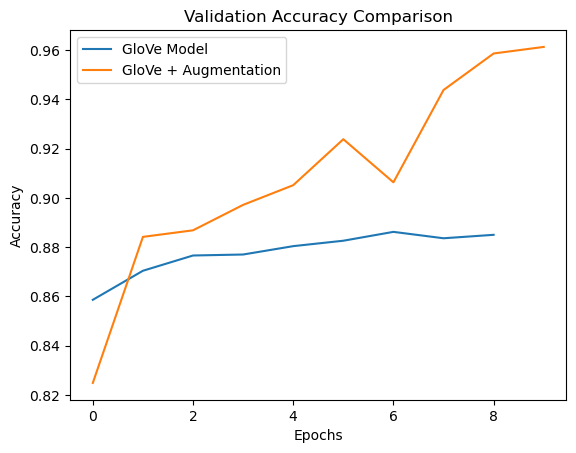

In [118]:
# Plot validation accuracy
plt.plot(history_glove.history['val_accuracy'], label='GloVe Model')
plt.plot(history_aug.history['val_accuracy'], label='GloVe + Augmentation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation of GloVe augmented model:
What we notice is sharp increase in validation accuracy for the augmented model, despite seeing reduced test accuracy from the GloVe only model, which points to a design error in the network. The augmentation that was done involved synonym replacement for a subset of the dataset and adding it to the original dataset. However, it also involves adding 5000 additional training datapoints for the output (y_train augmented). This means that the culprit for the discrepancy between validation and test accuracy for the augmented model comes from the use of altered data in the validation (training data was split into 80% for training and 20% for validation). To fix this issue, the validation data needs to be modified in the following iterations.

## Augemented GloVe Model using unseen validation data

In [120]:
model_aug = create_glove_model()
history_aug = model_aug.fit(
    x_train_padded_aug, y_train_combined,
    validation_data=(x_test_padded, y_test),
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 103ms/step - accuracy: 0.7803 - loss: 0.4657 - val_accuracy: 0.8500 - val_loss: 0.3530
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 150ms/step - accuracy: 0.8690 - loss: 0.3084 - val_accuracy: 0.8644 - val_loss: 0.3184
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 104ms/step - accuracy: 0.8887 - loss: 0.2702 - val_accuracy: 0.8924 - val_loss: 0.2681
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.9125 - loss: 0.2221 - val_accuracy: 0.8922 - val_loss: 0.2629
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 100ms/step - accuracy: 0.9282 - loss: 0.1867 - val_accuracy: 0.8851 - val_loss: 0.2855
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 100ms/step - accuracy: 0.9450 - loss: 0.1464 - val_accuracy: 0.8760 - val_loss: 0.3334
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.9609 - loss: 0.1137 - val_accuracy: 0.8791 - val_loss: 0.3408


In [129]:
model_aug.evaluate(x_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8889 - loss: 0.2672


[0.2628534734249115, 0.8921999931335449]

## Original GloVe Model using unseen validation data 

In [124]:
model_glove = create_glove_model()
history_glove = model_glove.fit(
    x_train_padded, y_train,
    validation_data=(x_test_padded, y_test),
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 111ms/step - accuracy: 0.7764 - loss: 0.4715 - val_accuracy: 0.8563 - val_loss: 0.3441
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.8599 - loss: 0.3322 - val_accuracy: 0.8730 - val_loss: 0.3148
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.8807 - loss: 0.2906 - val_accuracy: 0.8788 - val_loss: 0.2907
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.8918 - loss: 0.2661 - val_accuracy: 0.8834 - val_loss: 0.2714
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.9052 - loss: 0.2292 - val_accuracy: 0.8900 - val_loss: 0.2696
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.9129 - loss: 0.2146 - val_accuracy: 0.8875 - val_loss: 0.2793
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.9291 - loss: 0.1845 - val_accuracy: 0.8890 - val_loss: 0.2834
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.9459 - loss: 0

In [131]:
model_glove.evaluate(x_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8859 - loss: 0.2748


[0.26964321732521057, 0.889959990978241]

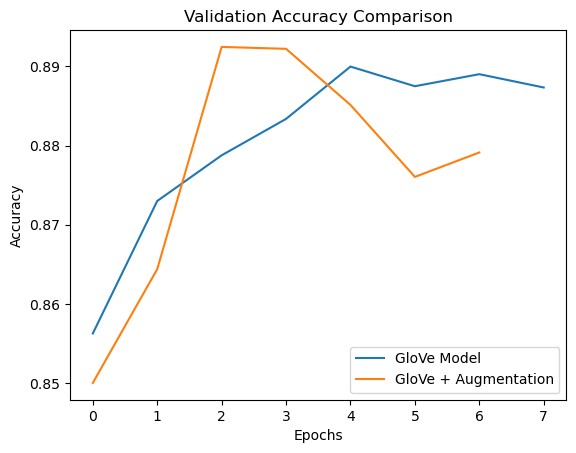

In [125]:
# Plot validation accuracy
plt.plot(history_glove.history['val_accuracy'], label='GloVe Model')
plt.plot(history_aug.history['val_accuracy'], label='GloVe + Augmentation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluation and conclusion
After the use of the test data for validation instead of the training data 80-20, we notice that the validation accuracy returns to normal, wherein it matches the test accuracy and comes close to the original Glove Model as can be seen in the graph above. This shows that it is crucial to remain aware of what is being fed into the model. Fortunately, we also get the highest validation and test accuracy observed throughout with the augmented GloVe Model (>89% in multiple epochs), so we can conclude that the use of synonym replacement helps.

On a separate note, we see that our models had a tendency to overfit where they consistently shoot above 90% for training accuracy and plateau around 85-89% for validation and test accuracy, therefore, the use of the early stopping callback with best weight restoration feature on was a good way to ensure that we are getting the best feaures out of whatever model we used without going into advanced epochs when it serves minimal purpose. Moreover, we noticed that relu had a very poor performance likely due to exploding gradient issues due to the long text sequences that it was exposed to in this dataset.

Per review of data and literature online, the test accuracy for the IMDB dataset tends to fall within 85-90% for a well-trained model, so the results we got here are satisfactory. However, there are several techniques that can be used to further improve the accuracy of the model which could be explored in a more extensive project. Some of those techniques are:

1. The use of other tokenization techniques like spaCy or subword tokenization
2. The use of contextual embeddings like BERT and transformers
3. Better RNN structure of the model such as the use of bi-directionality to enhance semantic understanding of the model
4. The use of hybrid models, such as ones that combine CNN and RNN for better feature extraction through local patterns via CNN and sequential patterns via RNN
5. The use of attention mechanisms/transformers 

